In [219]:
import pandas as pd
import numpy as np

In [220]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [221]:
df.shape

(5572, 2)

In [222]:
from sklearn.preprocessing import LabelEncoder

In [223]:
le_category = LabelEncoder()

In [224]:
df['spam'] = le_category.fit_transform(df.Category)
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [225]:
#optional way to encode

# df['spam'] = df.Category.map({'ham' : 0, 'spam' : 1})
# df

In [226]:
from sklearn.model_selection import train_test_split

In [227]:
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, train_size=0.8)

In [228]:
from sklearn.feature_extraction.text import CountVectorizer

In [229]:
vectorizer = CountVectorizer()

In [230]:
X_train = vectorizer.fit_transform(X_train.values)
X_test = vectorizer.transform(X_test)

In [231]:
# print(vectorizer.get_feature_names())

In [232]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [233]:
from sklearn.naive_bayes import MultinomialNB

In [234]:
nb = MultinomialNB()

In [235]:
nb.fit(X_train, y_train)

MultinomialNB()

In [236]:
y_pred = nb.predict(X_test)

In [237]:
from sklearn import metrics

In [238]:
cm = metrics.confusion_matrix(y_test, y_pred)

In [239]:
from matplotlib import pyplot as plt
import seaborn as sn

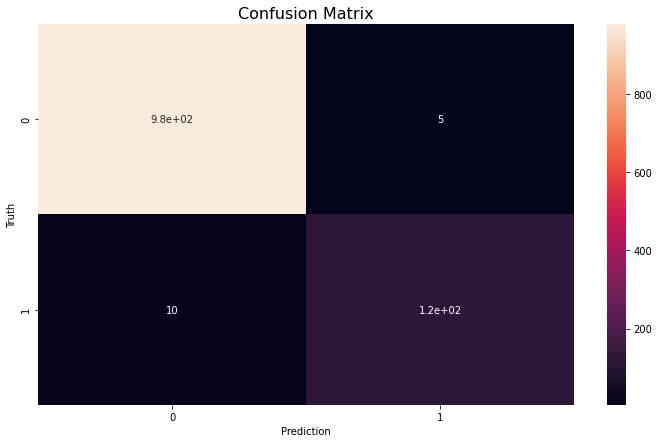

In [258]:
plt.figure(figsize=(12, 7))
sn.heatmap(cm, annot=True)
plt.title("Confusion Matrix", fontsize=16)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show()

In [259]:
metrics.accuracy_score(y_test, y_pred)

0.9865470852017937

In [260]:
sample_test =[
    'Hello James, this is Prince Krampah. Just finding out how you doing.',
    'Get 1000GB free internet data for the whole year with 20% discount',
    'This is the best offer yet, get 1 million dollars for watching a youtube video all for free'
]

In [261]:
sample_test = vectorizer.transform(sample_test)

In [262]:
nb.predict(sample_test)

array([0, 1, 0])